Columns: ['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


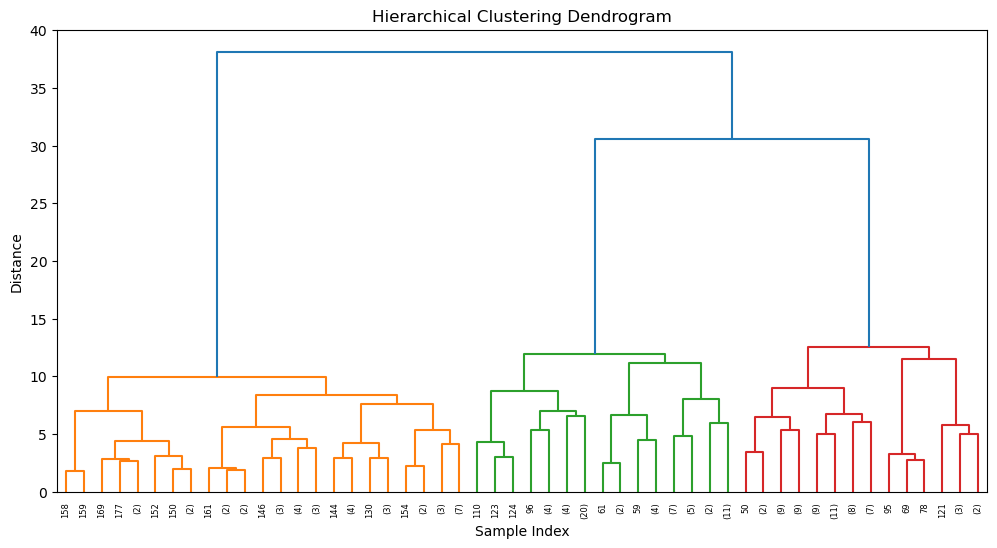

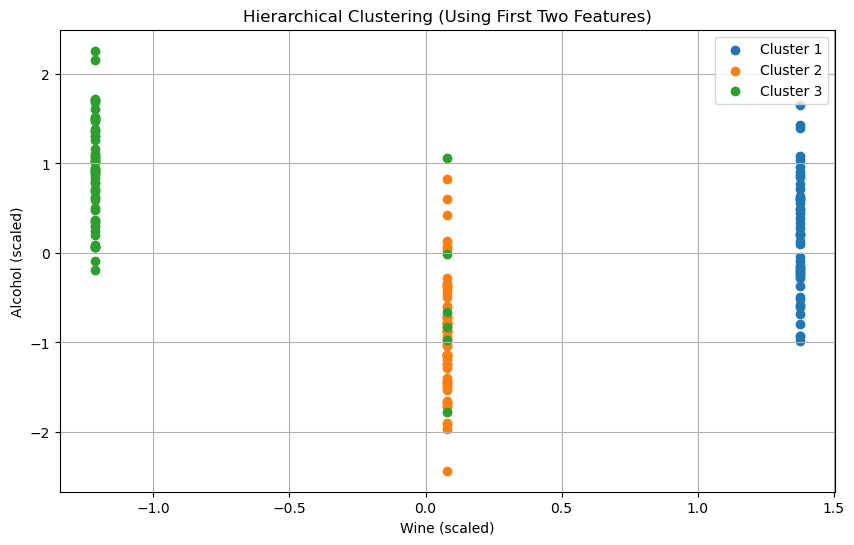

Cluster
3    65
2    65
1    48
Name: count, dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load the dataset
df = pd.read_csv('wine.csv')

# Check and display column names (optional)
print("Columns:", df.columns.tolist())

# Drop the target column if it exists (case-insensitive and trimmed)
target_col = [col for col in df.columns if col.strip().lower() == 'target']
X = df.drop(columns=target_col) if target_col else df.copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Choose number of clusters
num_clusters = 3
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize using first two features
plt.figure(figsize=(10, 6))
for cluster in range(1, num_clusters + 1):
    plt.scatter(X_scaled[cluster_labels == cluster, 0],
                X_scaled[cluster_labels == cluster, 1],
                label=f'Cluster {cluster}')
plt.title('Hierarchical Clustering (Using First Two Features)')
plt.xlabel(f'{X.columns[0]} (scaled)')
plt.ylabel(f'{X.columns[1]} (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Print cluster counts
print(df['Cluster'].value_counts())